In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as scs
import joblib
import yaml
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

## What to do?
1. Missing value handling
1.1. pm10      : mean kelas
1.2. pm25      : mean kelas
1.3. so2       : mean
1.4. co        : median
1.5. o3        : median
1.6. no2       : median

2. Join kategori sedang dan tidak sehat menjadi tidak baik

3. Balancing label baik dan tidak baik

4. Outlier removal

In [2]:
# import params
params_dir = "config/params.yaml"

In [3]:
def load_params(param_dir):
    with open(param_dir, "r") as file:
        params = yaml.safe_load(file)
        
    return params

In [4]:
def params_updater(key, value, params, params_dir):
    params = params.copy()
    params[key] = value

    with open(params_dir, "w") as file:
        yaml.dump(params, file)
    
    params = load_params(params_dir)

    return params

In [5]:
params = load_params(params_dir)

In [6]:
# load dataset
x_train = joblib.load("data/processed/x_train.pkl")
y_train = joblib.load("data/processed/y_train.pkl")

x_valid = joblib.load("data/processed/x_valid.pkl")
y_valid = joblib.load("data/processed/y_valid.pkl")

x_test = joblib.load("data/processed/x_test.pkl")
y_test = joblib.load("data/processed/y_test.pkl")

In [7]:
dataset = pd.concat([x_train, y_train], axis = 1)

valid_set = pd.concat([x_valid, y_valid], axis = 1)

test_set = pd.concat([x_test, y_test], axis = 1)

In [8]:
# join categories
def join_cat(set_data, params):
    if params["label"] in set_data.columns.to_list():
        set_data = set_data.copy()
        set_data.categori.replace(params["label_categories"][1], params["label_categories"][2], inplace = True)
        set_data.categori.replace(params["label_categories"][2], params["label_categories_new"][1], inplace = True)
        return set_data
    else:
        raise RuntimeError("Kolom label tidak terdeteksi pada set data yang diberikan!")

In [9]:
params = params_updater("label", "categori", params, params_dir)
params = params_updater("label_categories", ["BAIK", "SEDANG", "TIDAK SEHAT"], params, params_dir)
params = params_updater("label_categories_new", ["BAIK", "TIDAK BAIK"], params, params_dir)

train set

In [10]:
dataset.categori.value_counts()

SEDANG         944
TIDAK SEHAT    190
BAIK           132
Name: categori, dtype: int64

In [11]:
dataset = join_cat(dataset, params)

In [12]:
dataset.categori.value_counts()

TIDAK BAIK    1134
BAIK           132
Name: categori, dtype: int64

valid set

In [13]:
valid_set.categori.value_counts()

SEDANG         202
TIDAK SEHAT     41
BAIK            28
Name: categori, dtype: int64

In [14]:
valid_set = join_cat(valid_set, params)

In [15]:
valid_set.categori.value_counts()

TIDAK BAIK    243
BAIK           28
Name: categori, dtype: int64

test set

In [16]:
test_set.categori.value_counts()

SEDANG         203
TIDAK SEHAT     41
BAIK            28
Name: categori, dtype: int64

In [17]:
test_set = join_cat(test_set, params)

In [18]:
test_set.categori.value_counts()

TIDAK BAIK    244
BAIK           28
Name: categori, dtype: int64

## Handling Missing Values

In [19]:
# handling missing values
def nan_detector(set_data):
    set_data = set_data.copy()
    set_data.replace(-1, np.nan, inplace = True)
    return set_data

In [20]:
# convert -1 to NaN

# trainset

dataset.describe()

,pm10,pm25,so2,co,o3,no2
count,1266.000000,1266.000000,1266.000000,1266.000000,1266.000000,1266.00000
mean,50.591627,74.102686,33.012638,11.674566,30.441548,19.49842
std,17.155091,27.790928,14.836069,5.299409,15.382352,9.55990
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.00000
25%,42.000000,59.000000,24.000000,8.000000,21.000000,13.00000
50%,53.000000,77.000000,33.000000,11.000000,28.000000,18.00000
75%,61.000000,91.000000,43.000000,14.000000,38.000000,25.00000
max,179.000000,174.000000,82.000000,47.000000,151.000000,65.00000


In [21]:
dataset.isnull().sum()

stasiun     0
pm10        0
pm25        0
so2         0
co          0
o3          0
no2         0
categori    0
dtype: int64

In [22]:
dataset = nan_detector(dataset)

In [23]:
dataset.isnull().sum()

stasiun      0
pm10        37
pm25        57
so2         67
co          14
o3          38
no2         10
categori     0
dtype: int64

In [24]:
# valid set

valid_set.describe()

,pm10,pm25,so2,co,o3,no2
count,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000
mean,51.328413,74.833948,32.601476,12.169742,31.638376,19.811808
std,15.694039,29.696709,14.648848,5.479319,15.748317,10.465358
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,41.000000,60.000000,24.500000,9.000000,21.000000,12.000000
50%,54.000000,77.000000,32.000000,11.000000,28.000000,19.000000
75%,61.500000,93.000000,42.500000,14.500000,38.500000,25.000000
max,87.000000,156.000000,67.000000,44.000000,104.000000,62.000000


In [25]:
valid_set.isnull().sum()

stasiun     0
pm10        0
pm25        0
so2         0
co          0
o3          0
no2         0
categori    0
dtype: int64

In [26]:
valid_set = nan_detector(valid_set)

In [27]:
valid_set.isnull().sum()

stasiun      0
pm10         5
pm25        16
so2         17
co           2
o3           5
no2          5
categori     0
dtype: int64

In [28]:
# test set

test_set.describe()

,pm10,pm25,so2,co,o3,no2
count,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000
mean,50.786765,75.250000,34.852941,11.852941,32.161765,18.849265
std,17.152198,26.986603,15.019068,4.762289,16.239090,9.013074
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,41.750000,62.000000,25.000000,9.000000,21.000000,13.000000
50%,54.500000,78.000000,36.000000,11.000000,29.000000,18.000000
75%,62.000000,90.250000,45.000000,15.000000,40.250000,24.000000
max,88.000000,147.000000,80.000000,32.000000,86.000000,55.000000


In [29]:
test_set.isnull().sum()

stasiun     0
pm10        0
pm25        0
so2         0
co          0
o3          0
no2         0
categori    0
dtype: int64

In [30]:
test_set = nan_detector(test_set)

In [31]:
test_set.isnull().sum()

stasiun      0
pm10        10
pm25        11
so2         14
co           4
o3           9
no2          4
categori     0
dtype: int64

handling PM10 data

In [32]:
# train set
impute_1 = int(dataset[dataset.categori == "BAIK"].pm10.mean())
impute_0 = int(dataset[dataset.categori == "TIDAK BAIK"].pm10.mean())

In [33]:
impute_1, impute_0

(28, 54)

In [34]:
params = params_updater("missing_value_pm10", {"BAIK": 28, "TIDAK BAIK": 54}, params, params_dir)

In [35]:
dataset[dataset.categori == "BAIK"].pm10.isnull().sum(), dataset[dataset.categori == "TIDAK BAIK"].pm10.isnull().sum()

(6, 31)

In [36]:
dataset.loc[dataset[(dataset.categori == "BAIK") & (dataset.pm10.isnull() == True)].index, "pm10"] = impute_1
dataset.loc[dataset[(dataset.categori == "TIDAK BAIK") & (dataset.pm10.isnull() == True)].index, "pm10"] = impute_0

In [37]:
dataset[dataset.categori == "BAIK"].pm10.isnull().sum(), dataset[dataset.categori == "TIDAK BAIK"].pm10.isnull().sum()

(0, 0)

In [38]:
# valid set
valid_set[valid_set.categori == "BAIK"].pm10.isnull().sum(), valid_set[valid_set.categori == "TIDAK BAIK"].pm10.isnull().sum()

(1, 4)

In [39]:
valid_set.loc[valid_set[(valid_set.categori == "BAIK") & (valid_set.pm10.isnull() == True)].index, "pm10"] = impute_1
valid_set.loc[valid_set[(valid_set.categori == "TIDAK BAIK") & (valid_set.pm10.isnull() == True)].index, "pm10"] = impute_0

In [40]:
valid_set[valid_set.categori == "BAIK"].pm10.isnull().sum(), valid_set[valid_set.categori == "TIDAK BAIK"].pm10.isnull().sum()

(0, 0)

In [41]:
# test set
test_set[test_set.categori == "BAIK"].pm10.isnull().sum(), test_set[test_set.categori == "TIDAK BAIK"].pm10.isnull().sum()

(3, 7)

In [42]:
test_set.loc[test_set[(test_set.categori == "BAIK") & (test_set.pm10.isnull() == True)].index, "pm10"] = impute_1
test_set.loc[test_set[(test_set.categori == "TIDAK BAIK") & (test_set.pm10.isnull() == True)].index, "pm10"] = impute_0

In [43]:
test_set[test_set.categori == "BAIK"].pm10.isnull().sum(), test_set[test_set.categori == "TIDAK BAIK"].pm10.isnull().sum()

(0, 0)

handling PM25 Data

In [44]:
# train set
impute_1 = int(dataset[dataset.categori == "BAIK"].pm25.mean())
impute_0 = int(dataset[dataset.categori == "TIDAK BAIK"].pm25.mean())

In [45]:
impute_1, impute_0

(39, 81)

In [46]:
params = params_updater("missing_value_pm25", {"BAIK": 38, "TIDAK BAIK": 81}, params, params_dir)

In [47]:
dataset[dataset.categori == "BAIK"].pm25.isnull().sum(), dataset[dataset.categori == "TIDAK BAIK"].pm25.isnull().sum()

(34, 23)

In [48]:
dataset.loc[dataset[(dataset.categori == "BAIK") & (dataset.pm25.isnull() == True)].index, "pm25"] = impute_1
dataset.loc[dataset[(dataset.categori == "TIDAK BAIK") & (dataset.pm25.isnull() == True)].index, "pm25"] = impute_0

In [49]:
dataset[dataset.categori == "BAIK"].pm10.isnull().sum(), dataset[dataset.categori == "TIDAK BAIK"].pm10.isnull().sum()

(0, 0)

In [50]:
# valid set
valid_set[valid_set.categori == "BAIK"].pm25.isnull().sum(), valid_set[valid_set.categori == "TIDAK BAIK"].pm25.isnull().sum()

(8, 8)

In [51]:

valid_set.loc[valid_set[(valid_set.categori == "BAIK") & (valid_set.pm25.isnull() == True)].index, "pm25"] = impute_1
valid_set.loc[valid_set[(valid_set.categori == "TIDAK BAIK") & (valid_set.pm25.isnull() == True)].index, "pm25"] = impute_0

In [52]:
dataset[dataset.categori == "BAIK"].pm10.isnull().sum(), dataset[dataset.categori == "TIDAK BAIK"].pm10.isnull().sum()

(0, 0)

In [53]:
# test set
test_set[test_set.categori == "BAIK"].pm25.isnull().sum(), test_set[test_set.categori == "TIDAK BAIK"].pm25.isnull().sum()

(7, 4)

In [54]:
test_set.loc[test_set[(test_set.categori == "BAIK") & (test_set.pm25.isnull() == True)].index, "pm25"] = impute_1
test_set.loc[test_set[(test_set.categori == "TIDAK BAIK") & (test_set.pm25.isnull() == True)].index, "pm25"] = impute_0

In [55]:
test_set[test_set.categori == "BAIK"].pm10.isnull().sum(), test_set[test_set.categori == "TIDAK BAIK"].pm10.isnull().sum()

(0, 0)

Handling in SO2, CO, O3, dan NO2

In [56]:
# train set

impute_so2 = int(dataset.so2.mean())
impute_co = int(dataset.co.median())
impute_o3 = int(dataset.o3.median())
impute_no2 = int(dataset.no2.median())


In [57]:
impute_values = {"so2" : impute_so2, "co" : impute_co, "o3" : impute_o3, "no2" : impute_no2}

In [58]:
impute_values

{'so2': 34, 'co': 11, 'o3': 28, 'no2': 18}

In [59]:
params = params_updater("missing_value_so2", 34, params, params_dir)
params = params_updater("missing_value_co", 11, params, params_dir)
params = params_updater("missing_value_o3", 28, params, params_dir)
params = params_updater("missing_value_no2", 18, params, params_dir)

In [60]:
dataset.isnull().sum()

stasiun      0
pm10         0
pm25         0
so2         67
co          14
o3          38
no2         10
categori     0
dtype: int64

In [61]:
dataset.fillna(value = impute_values, inplace = True)

In [62]:
dataset.isnull().sum()

stasiun     0
pm10        0
pm25        0
so2         0
co          0
o3          0
no2         0
categori    0
dtype: int64

In [63]:
# valid set

valid_set.isnull().sum()

stasiun      0
pm10         0
pm25         0
so2         17
co           2
o3           5
no2          5
categori     0
dtype: int64

In [64]:
valid_set.fillna(value = impute_values, inplace = True)

In [65]:
valid_set.isnull().sum()

stasiun     0
pm10        0
pm25        0
so2         0
co          0
o3          0
no2         0
categori    0
dtype: int64

In [66]:
# test set

test_set.isnull().sum()

stasiun      0
pm10         0
pm25         0
so2         14
co           4
o3           9
no2          4
categori     0
dtype: int64

In [67]:
test_set.fillna(value = impute_values, inplace = True)

In [68]:
test_set.isnull().sum()

stasiun     0
pm10        0
pm25        0
so2         0
co          0
o3          0
no2         0
categori    0
dtype: int64

# encoding stasiun!

In [69]:
ohe_statiun = OneHotEncoder(sparse = False)

In [70]:
ohe_statiun.fit(np.array(params["range_stasiun"]).reshape(-1, 1))

OneHotEncoder(sparse=False)

In [71]:
ohe_statiun.categories_

[array(['DKI1 (Bunderan HI)', 'DKI2 (Kelapa Gading)', 'DKI3 (Jagakarsa)',
        'DKI4 (Lubang Buaya)', 'DKI5 (Kebon Jeruk) Jakarta Barat'],
       dtype='<U32')]

In [72]:
joblib.dump(ohe_statiun, "models/ohe_stasiun.pkl")

['models/ohe_stasiun.pkl']

In [73]:
# train set

stasiun_features = ohe_statiun.transform(np.array(dataset.stasiun.to_list()).reshape(-1, 1))

In [74]:
stasiun_features = pd.DataFrame(stasiun_features, columns = params["range_stasiun"])

In [75]:
stasiun_features.set_index(dataset.index, inplace = True)

In [76]:
dataset = pd.concat([stasiun_features, dataset], axis = 1)

In [77]:
dataset.drop(columns = "stasiun", inplace = True)

In [78]:
# valid set

stasiun_features = ohe_statiun.transform(np.array(valid_set.stasiun.to_list()).reshape(-1, 1))

In [79]:
stasiun_features = pd.DataFrame(stasiun_features, columns = params["range_stasiun"])

In [80]:
stasiun_features.set_index(valid_set.index, inplace = True)

In [81]:
valid_set = pd.concat([stasiun_features, valid_set], axis = 1)

In [82]:
valid_set.drop(columns = "stasiun", inplace = True)

In [83]:
# test set

stasiun_features = ohe_statiun.transform(np.array(test_set.stasiun.to_list()).reshape(-1, 1))

In [84]:
stasiun_features = pd.DataFrame(stasiun_features, columns = params["range_stasiun"])

In [85]:
stasiun_features.set_index(test_set.index, inplace = True)

In [86]:
test_set = pd.concat([stasiun_features, test_set], axis = 1)

In [87]:
test_set.drop(columns = "stasiun", inplace = True)

# Balancing Label!

<AxesSubplot:xlabel='categori', ylabel='Count'>

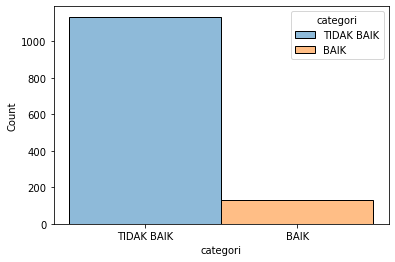

In [88]:
sns.histplot(data = dataset, x = "categori", hue = "categori")

In [89]:
# undersampling...

rus = RandomUnderSampler(random_state = 26)

In [90]:
x_rus, y_rus = rus.fit_resample(dataset.drop("categori", axis = 1), dataset.categori)

In [91]:
dataset_rus = pd.concat([x_rus, y_rus], axis = 1)

<AxesSubplot:xlabel='categori', ylabel='Count'>

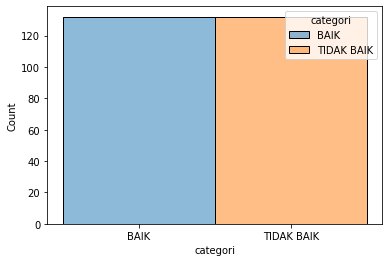

In [92]:
sns.histplot(dataset_rus, x = "categori", hue = "categori")

In [93]:
# oversamplinggggg

ros = RandomOverSampler(random_state = 11)

In [94]:
x_ros, y_ros = ros.fit_resample(dataset.drop("categori", axis = 1), dataset.categori)

In [95]:
dataset_ros = pd.concat([x_ros, y_ros], axis = 1)

<AxesSubplot:xlabel='categori', ylabel='Count'>

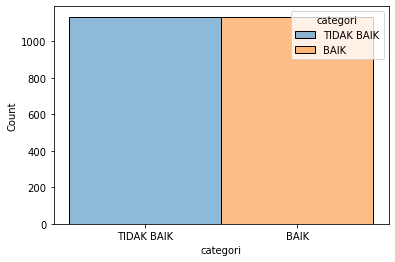

In [96]:
sns.histplot(dataset_ros, x = "categori", hue = "categori")

In [97]:
# SMOTE
# LONGSHORT STORY, MIRIP SAMA OVERSAMPLING!

sm = SMOTE(random_state = 112)

In [98]:
x_sm, y_sm = sm.fit_resample(dataset.drop("categori", axis = 1), dataset.categori)

In [99]:
dataset_ros = pd.concat([x_ros, y_ros], axis = 1)

<AxesSubplot:xlabel='categori', ylabel='Count'>

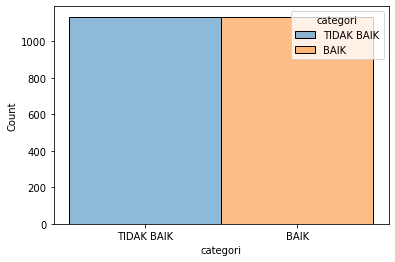

In [100]:
sns.histplot(dataset_ros, x = "categori", hue = "categori")

# Label Encoding!

In [101]:
le_categori = LabelEncoder()

In [102]:
le_categori.fit(params["label_categories_new"])

LabelEncoder()

In [103]:
joblib.dump(le_categori, "models/le_categori.pkl")

['models/le_categori.pkl']

In [104]:
params["label_categories_new"]

['BAIK', 'TIDAK BAIK']

In [105]:
# undersampling set

list(y_rus.unique()) == params["label_categories_new"]

True

In [106]:
y_rus = le_categori.transform(y_rus)

In [107]:
# oversampling set

list(y_ros.unique()) == params["label_categories_new"]

False

In [108]:
y_ros = le_categori.transform(y_ros)

In [109]:
# SMOTE 

list(y_sm.unique()) == params["label_categories_new"]

False

In [110]:
y_sm = le_categori.transform(y_sm)

In [111]:
# Validation Set

len(set(valid_set.categori.unique()) - set(params["label_categories_new"])) == 0

True

In [112]:
valid_set.categori = le_categori.transform(valid_set.categori)

In [113]:
# Test Set

len(set(test_set.categori.unique()) - set(params["label_categories_new"])) == 0

True

In [114]:
test_set.categori = le_categori.transform(test_set.categori)

# Dump data latih

In [115]:
joblib.dump(x_rus, "data/processed/x_rus.pkl")
joblib.dump(y_rus, "data/processed/y_rus.pkl")

joblib.dump(x_ros, "data/processed/x_ros.pkl")
joblib.dump(y_ros, "data/processed/y_ros.pkl")

joblib.dump(x_sm, "data/processed/x_sm.pkl")
joblib.dump(y_sm, "data/processed/y_sm.pkl")

joblib.dump(valid_set.drop(columns = "categori"), "data/processed/x_valid_feng.pkl")
joblib.dump(valid_set.categori, "data/processed/y_valid_feng.pkl")

joblib.dump(test_set.drop(columns = "categori"), "data/processed/x_test_feng.pkl")
joblib.dump(test_set.categori, "data/processed/y_test_feng.pkl")

['data/processed/y_test_feng.pkl']